In [1]:
# pip install spacy

# Simple Document Classification using Multi Class Logistic Regression

> You don't need to change anything in the Jupyter notebook. You can just write your answer to the given space in the ```MultiClass.py``` file.

In this part of the assignment, you will implement the Logistic Regression algorithm with the One-vs-All strategy to adapt the algorithm for the multi-classification task. You will use the momentum with SGD optimizer to optimize the Binary Cross-Entropy loss to obtain the optimal weight matrix.

The data is already cleaned and doesn't need any further pre-processing. It is encoded using Tf-idf (Term Frequency Inverse Document Frequency).

All the information you need for solving this assignment is in this notebook, and all of the code you will be implementing takes place in ```MultiClassClassification.py``` script.

Warning: This assignment requires that you perform operations with matrices in Numpy (e.g., multiplication and summation of the column vectors of a matrix). You should learn how to use the operations needed to complete the assignment. Numpy's documentation can be a good resource: https://numpy.org/doc/stable/

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.de.stop_words import STOP_WORDS
import MultiClass


data_path = 'trainingdata.txt'
f = open(data_path, 'r') 
train_data = f.readlines()

# Number of samples in training set
N = int(train_data.pop(0))

# Labels & training data
labels = [int(elt[0]) for elt in train_data]
documents = [elt[2:] for elt in train_data]

# Create a pandas Dataframe
df = pd.DataFrame(data={"Text": documents, "Category": labels})

df.head()

,Text,Category
0,champion products ch approves stock split cham...,1
1,computer terminal systems cpml completes sale ...,2
2,cobanco inc cbco year net shr cts vs dlrs net ...,1
3,am international inc am nd qtr jan oper shr lo...,1
4,brown forman inc bfd th qtr net shr one dlr vs...,1


In [3]:
# Split the data into training & testing sets

X = df["Text"]
Y = df["Category"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [4]:
# Sklearn tfidf returns a csr_matrix data type (Compressed Sparse Row
# matrix), where it stores only values different from zero and their
# corresponding indices.
tfidf = TfidfVectorizer(min_df=0.005, max_df=0.7, stop_words=list(STOP_WORDS))

# Convert the text to tfidf matrices
x_train_vect = tfidf.fit_transform(x_train).toarray()
x_test_vect = tfidf.transform(x_test).toarray()

# Dimension of feature space
F = len(x_train_vect[0])

# Inserting ones in the first column for bias estimation
x_train_vect = np.insert(x_train_vect, 0, 1, axis=1)
x_test_vect = np.insert(x_test_vect, 0, 1, axis=1)

print("Shape of the training set {}".format(x_train_vect.shape))
print("Shape of the testing set {}".format(x_test_vect.shape))


Shape of the training set (4388, 1554)
Shape of the testing set (1097, 1554)


## 1)- Multi Class Logistic Regression

In [5]:
#################### Defining the basic parameters for training the Logistic Regression model #######################

# Learning rate
alpha = 0.001
# Momentum parameter for the optimizer
beta = 0.9
# Number of samples in a mini-batch
mb = 100
# Number of classes
n_class = 8
# Number of Epochs
n_epochs = 60
# Show the evolution of training
info = 1

# Training the model
log_reg = MultiClass.OneVsAll(x_train_vect, y_train, x_test_vect, y_test,
                                               alpha, beta, mb, n_class, F, n_epochs, info)
lr_weights, lr_loss, lr_acc = log_reg.train()

-------------------------------------------------- Processing class 1 --------------------------------------------------

Epoch: [[ 2.30891330e-02]
 [-2.67206706e-04]
 [ 3.13713446e-05]
 ...
 [ 3.19168135e-04]
 [-9.71326050e-05]
 [ 2.70432052e-04]] | Duration: 8.6s | Train loss: 0.42929 | Train accuracy: 89.18713598379337% | Validation loss: 0.43273 | Validation accuracy: 87.92710706150342%
Epoch: [[ 1.76647618e-02]
 [-2.86828704e-04]
 [-4.43989773e-05]
 ...
 [ 2.60073531e-04]
 [-5.88844486e-05]
 [ 1.95076833e-04]] | Duration: 8.92s | Train loss: 0.34528 | Train accuracy: 89.71891618131173% | Validation loss: 0.35549 | Validation accuracy: 88.61047835990888%
Epoch: [[ 1.38859806e-02]
 [-2.92269715e-04]
 [-7.72119550e-05]
 ...
 [ 2.26764814e-04]
 [-4.11378581e-05]
 [ 1.57714075e-04]] | Duration: 9.33s | Train loss: 0.30107 | Train accuracy: 90.47860217776652% | Validation loss: 0.3161 | Validation accuracy: 89.52164009111617%
Epoch: [[ 1.11004915e-02]
 [-2.92302612e-04]
 [-9.35462185e-0

Epoch: [[-6.60274159e-03]
 [-1.94935779e-04]
 [-7.52642075e-05]
 ...
 [ 7.01218511e-05]
 [-3.66753520e-06]
 [ 6.24165211e-05]] | Duration: 10.1s | Train loss: 0.09923 | Train accuracy: 96.9865788807293% | Validation loss: 0.13716 | Validation accuracy: 96.12756264236901%
Epoch: [[-6.77288897e-03]
 [-1.92760426e-04]
 [-7.43861008e-05]
 ...
 [ 6.88309902e-05]
 [-3.54044877e-06]
 [ 6.21726187e-05]] | Duration: 8.16s | Train loss: 0.09738 | Train accuracy: 97.01190174727779% | Validation loss: 0.13547 | Validation accuracy: 96.12756264236901%
Epoch: [[-6.93369169e-03]
 [-1.90665985e-04]
 [-7.35572659e-05]
 ...
 [ 6.76071122e-05]
 [-3.42111078e-06]
 [ 6.19480908e-05]] | Duration: 10.2s | Train loss: 0.09561 | Train accuracy: 97.03722461382628% | Validation loss: 0.13385 | Validation accuracy: 96.12756264236901%
Epoch: [[-7.08587776e-03]
 [-1.88648587e-04]
 [-7.27750265e-05]
 ...
 [ 6.64450342e-05]
 [-3.30884199e-06]
 [ 6.17406581e-05]] | Duration: 8.48s | Train loss: 0.09393 | Train accurac

Epoch: [[ 1.36189101e-02]
 [ 1.56319326e-04]
 [-2.55430860e-04]
 ...
 [ 1.73904170e-04]
 [ 6.53923221e-05]
 [ 4.72093711e-05]] | Duration: 6.97s | Train loss: 0.43961 | Train accuracy: 70.62547480374778% | Validation loss: 0.4486 | Validation accuracy: 74.25968109339408%
Epoch: [[ 1.35831890e-02]
 [ 1.70631093e-04]
 [-2.12225230e-04]
 ...
 [ 1.83184908e-04]
 [ 4.20949470e-05]
 [ 8.70682649e-05]] | Duration: 7.26s | Train loss: 0.37943 | Train accuracy: 75.89263104583439% | Validation loss: 0.39403 | Validation accuracy: 77.22095671981776%
Epoch: [[ 1.29961779e-02]
 [ 1.76424367e-04]
 [-1.93718780e-04]
 ...
 [ 1.80362292e-04]
 [ 3.03303456e-05]
 [ 1.04534781e-04]] | Duration: 7.54s | Train loss: 0.33838 | Train accuracy: 84.50240567232211% | Validation loss: 0.35835 | Validation accuracy: 85.6492027334852%
Epoch: [[ 1.23112880e-02]
 [ 1.78775360e-04]
 [-1.85211714e-04]
 ...
 [ 1.73696332e-04]
 [ 2.34601688e-05]
 [ 1.12239144e-04]] | Duration: 8.33s | Train loss: 0.30681 | Train accuracy

Epoch: [[ 9.50086400e-03]
 [ 1.72310105e-04]
 [-1.53231592e-04]
 ...
 [ 7.28094465e-05]
 [ 2.54848545e-06]
 [ 5.66879574e-05]] | Duration: 9.46s | Train loss: 0.09844 | Train accuracy: 97.61965054444163% | Validation loss: 0.14522 | Validation accuracy: 97.03872437357631%
Epoch: [[ 9.52839632e-03]
 [ 1.72196140e-04]
 [-1.51983916e-04]
 ...
 [ 7.15762438e-05]
 [ 2.45382881e-06]
 [ 5.54242696e-05]] | Duration: 8.63s | Train loss: 0.0965 | Train accuracy: 97.67029627753861% | Validation loss: 0.14327 | Validation accuracy: 97.03872437357631%
Epoch: [[ 9.55509531e-03]
 [ 1.72085731e-04]
 [-1.50749449e-04]
 ...
 [ 7.03981793e-05]
 [ 2.36501643e-06]
 [ 5.42127279e-05]] | Duration: 8.79s | Train loss: 0.09465 | Train accuracy: 97.6956191440871% | Validation loss: 0.14141 | Validation accuracy: 97.03872437357631%
Epoch: [[ 9.58090588e-03]
 [ 1.71978526e-04]
 [-1.49529050e-04]
 ...
 [ 6.92713852e-05]
 [ 2.28155011e-06]
 [ 5.30503345e-05]] | Duration: 8.44s | Train loss: 0.09289 | Train accuracy

Epoch: [[-1.87643368e-02]
 [ 2.04679876e-05]
 [ 5.90652977e-05]
 ...
 [-5.78842800e-04]
 [ 1.38973446e-05]
 [ 5.00410954e-05]] | Duration: 4.43s | Train loss: 0.17257 | Train accuracy: 95.72043555330464% | Validation loss: 0.20643 | Validation accuracy: 93.62186788154898%
Epoch: [[-1.92685437e-02]
 [ 2.07318222e-05]
 [ 6.15550828e-05]
 ...
 [-5.70234427e-04]
 [ 1.19221258e-05]
 [ 5.07464807e-05]] | Duration: 3.95s | Train loss: 0.16098 | Train accuracy: 95.72043555330464% | Validation loss: 0.19328 | Validation accuracy: 93.62186788154898%
Epoch: [[-1.87639408e-02]
 [ 2.12083382e-05]
 [ 6.45595676e-05]
 ...
 [-5.60018777e-04]
 [ 1.05193136e-05]
 [ 5.18897312e-05]] | Duration: 3.86s | Train loss: 0.15038 | Train accuracy: 95.72043555330464% | Validation loss: 0.18097 | Validation accuracy: 93.62186788154898%
Epoch: [[-1.80698159e-02]
 [ 2.15507318e-05]
 [ 6.70697961e-05]
 ...
 [-5.49212776e-04]
 [ 9.36542920e-06]
 [ 5.26482090e-05]] | Duration: 4.19s | Train loss: 0.14078 | Train accura

Epoch: [[-7.08898322e-03]
 [ 1.26489088e-05]
 [ 4.94213724e-05]
 ...
 [-2.84268388e-04]
 [ 1.48660232e-06]
 [ 2.69107627e-05]] | Duration: 4.25s | Train loss: 0.05432 | Train accuracy: 98.30336794125095% | Validation loss: 0.05916 | Validation accuracy: 98.17767653758543%
Epoch: [[-6.98838821e-03]
 [ 1.23897833e-05]
 [ 4.86023503e-05]
 ...
 [-2.77957156e-04]
 [ 1.43290028e-06]
 [ 2.62362606e-05]] | Duration: 3.88s | Train loss: 0.05351 | Train accuracy: 98.35401367434794% | Validation loss: 0.05796 | Validation accuracy: 98.40546697038724%
Epoch: [[-6.89445280e-03]
 [ 1.21399908e-05]
 [ 4.78097290e-05]
 ...
 [-2.71842573e-04]
 [ 1.38254572e-06]
 [ 2.55891477e-05]] | Duration: 4.02s | Train loss: 0.05275 | Train accuracy: 98.37933654089643% | Validation loss: 0.05681 | Validation accuracy: 98.40546697038724%
Epoch: [[-6.80659128e-03]
 [ 1.18991378e-05]
 [ 4.70427457e-05]
 ...
 [-2.65918692e-04]
 [ 1.33525003e-06]
 [ 2.49681214e-05]] | Duration: 4.28s | Train loss: 0.05202 | Train accura

Epoch: [[-1.21277287e-03]
 [ 9.63903032e-06]
 [ 2.76210682e-05]
 ...
 [ 2.27869127e-05]
 [ 7.04490150e-06]
 [ 2.39392842e-05]] | Duration: 4.03s | Train loss: 0.12551 | Train accuracy: 98.02481640921752% | Validation loss: 0.10162 | Validation accuracy: 97.72209567198178%
Epoch: [[-2.20583121e-03]
 [ 9.44560378e-06]
 [ 2.75009347e-05]
 ...
 [ 2.23975262e-05]
 [ 6.27456707e-06]
 [ 2.35320151e-05]] | Duration: 4.28s | Train loss: 0.12296 | Train accuracy: 98.02481640921752% | Validation loss: 0.09976 | Validation accuracy: 97.72209567198178%
Epoch: [[-2.56113070e-03]
 [ 9.51304889e-06]
 [ 2.81147824e-05]
 ...
 [ 2.25892614e-05]
 [ 5.77143415e-06]
 [ 2.37572106e-05]] | Duration: 4.02s | Train loss: 0.12029 | Train accuracy: 98.02481640921752% | Validation loss: 0.09796 | Validation accuracy: 97.72209567198178%
Epoch: [[-2.66658235e-03]
 [ 9.67320006e-06]
 [ 2.90001994e-05]
 ...
 [ 2.29919540e-05]
 [ 5.38438666e-06]
 [ 2.42070181e-05]] | Duration: 4.32s | Train loss: 0.11762 | Train accura

Epoch: [[-1.31142038e-03]
 [ 1.11278642e-05]
 [ 4.45106208e-05]
 ...
 [ 2.90825463e-05]
 [ 1.59593923e-06]
 [ 2.90334157e-05]] | Duration: 4.03s | Train loss: 0.06639 | Train accuracy: 98.02481640921752% | Validation loss: 0.06466 | Validation accuracy: 97.72209567198178%
Epoch: [[-1.27609908e-03]
 [ 1.10782996e-05]
 [ 4.46686299e-05]
 ...
 [ 2.90940606e-05]
 [ 1.54659638e-06]
 [ 2.89499942e-05]] | Duration: 4.38s | Train loss: 0.06517 | Train accuracy: 98.02481640921752% | Validation loss: 0.06392 | Validation accuracy: 97.72209567198178%
Epoch: [[-1.24200199e-03]
 [ 1.10254152e-05]
 [ 4.48084968e-05]
 ...
 [ 2.90976070e-05]
 [ 1.49962432e-06]
 [ 2.88580771e-05]] | Duration: 4.17s | Train loss: 0.06397 | Train accuracy: 98.02481640921752% | Validation loss: 0.0632 | Validation accuracy: 97.72209567198178%
Epoch: [[-1.20912219e-03]
 [ 1.09694714e-05]
 [ 4.49310619e-05]
 ...
 [ 2.90936445e-05]
 [ 1.45487706e-06]
 [ 2.87583013e-05]] | Duration: 3.68s | Train loss: 0.06281 | Train accurac

Epoch: [[ 8.40037070e-04]
 [ 4.03205495e-06]
 [-8.32975401e-05]
 ...
 [-8.57707077e-05]
 [ 3.55524650e-06]
 [ 1.01686504e-05]] | Duration: 3.83s | Train loss: 0.01015 | Train accuracy: 99.2909597366422% | Validation loss: 0.05018 | Validation accuracy: 99.08883826879271%
Epoch: [[-1.91557404e-04]
 [ 3.62981536e-06]
 [-8.43403033e-05]
 ...
 [-8.66405494e-05]
 [ 3.10631374e-06]
 [ 9.19165392e-06]] | Duration: 4.17s | Train loss: 0.00909 | Train accuracy: 99.2909597366422% | Validation loss: 0.04973 | Validation accuracy: 99.08883826879271%
Epoch: [[-8.29856434e-04]
 [ 3.38747579e-06]
 [-8.49440219e-05]
 ...
 [-8.71342901e-05]
 [ 2.81509792e-06]
 [ 8.60715113e-06]] | Duration: 3.93s | Train loss: 0.00843 | Train accuracy: 99.2909597366422% | Validation loss: 0.04936 | Validation accuracy: 99.08883826879271%
Epoch: [[-1.24726648e-03]
 [ 3.23460191e-06]
 [-8.52997870e-05]
 ...
 [-8.74134563e-05]
 [ 2.61168180e-06]
 [ 8.24298608e-06]] | Duration: 4.31s | Train loss: 0.008 | Train accuracy: 9

Epoch: [[-2.10620710e-03]
 [ 3.11713589e-06]
 [-8.25490800e-05]
 ...
 [-8.36420047e-05]
 [ 1.35200369e-06]
 [ 8.34138106e-06]] | Duration: 3.67s | Train loss: 0.00689 | Train accuracy: 99.2909597366422% | Validation loss: 0.03934 | Validation accuracy: 99.08883826879271%
Epoch: [[-2.10211399e-03]
 [ 3.11805741e-06]
 [-8.23924548e-05]
 ...
 [-8.34403720e-05]
 [ 1.32999634e-06]
 [ 8.35551904e-06]] | Duration: 3.74s | Train loss: 0.00688 | Train accuracy: 99.2909597366422% | Validation loss: 0.03904 | Validation accuracy: 99.08883826879271%
Epoch: [[-2.09816104e-03]
 [ 3.11838749e-06]
 [-8.22341739e-05]
 ...
 [-8.32364125e-05]
 [ 1.30849047e-06]
 [ 8.36798052e-06]] | Duration: 4.03s | Train loss: 0.00687 | Train accuracy: 99.2909597366422% | Validation loss: 0.03873 | Validation accuracy: 99.08883826879271%
Epoch: [[-2.09435412e-03]
 [ 3.11813496e-06]
 [-8.20741863e-05]
 ...
 [-8.30301039e-05]
 [ 1.28746875e-06]
 [ 8.37878492e-06]] | Duration: 4.3s | Train loss: 0.00686 | Train accuracy: 

Epoch: [[1.35815487e-02]
 [2.08861889e-05]
 [7.01937344e-05]
 ...
 [5.20686391e-05]
 [1.28169336e-05]
 [5.72255688e-05]] | Duration: 3.93s | Train loss: 0.15936 | Train accuracy: 95.28994682198025% | Validation loss: 0.10867 | Validation accuracy: 96.81093394077449%
Epoch: [[1.35088135e-02]
 [2.06483762e-05]
 [7.20896349e-05]
 ...
 [5.25792329e-05]
 [1.20813483e-05]
 [5.78500299e-05]] | Duration: 4.1s | Train loss: 0.1493 | Train accuracy: 95.28994682198025% | Validation loss: 0.1035 | Validation accuracy: 96.81093394077449%
Epoch: [[1.33876842e-02]
 [2.02751384e-05]
 [7.34199347e-05]
 ...
 [5.27257458e-05]
 [1.14311725e-05]
 [5.80581171e-05]] | Duration: 4.23s | Train loss: 0.14012 | Train accuracy: 95.28994682198025% | Validation loss: 0.09871 | Validation accuracy: 96.81093394077449%
Epoch: [[1.32228258e-02]
 [1.98008649e-05]
 [7.42614400e-05]
 ...
 [5.25705263e-05]
 [1.08512138e-05]
 [5.79245030e-05]] | Duration: 4.14s | Train loss: 0.13175 | Train accuracy: 95.28994682198025% | Va

Epoch: [[6.15132358e-03]
 [7.72622618e-06]
 [5.48457863e-05]
 ...
 [3.05872173e-05]
 [4.82756950e-06]
 [3.46825275e-05]] | Duration: 4.02s | Train loss: 0.04663 | Train accuracy: 98.32869080779945% | Validation loss: 0.04311 | Validation accuracy: 98.40546697038724%
Epoch: [[5.99526847e-03]
 [7.52202351e-06]
 [5.42439600e-05]
 ...
 [3.00663585e-05]
 [4.74593799e-06]
 [3.41337552e-05]] | Duration: 4.28s | Train loss: 0.04563 | Train accuracy: 98.32869080779945% | Validation loss: 0.04241 | Validation accuracy: 98.40546697038724%
Epoch: [[5.84539343e-03]
 [7.32694850e-06]
 [5.36609871e-05]
 ...
 [2.95636981e-05]
 [4.66750937e-06]
 [3.36040268e-05]] | Duration: 3.88s | Train loss: 0.04467 | Train accuracy: 98.40465940744492% | Validation loss: 0.04174 | Validation accuracy: 98.40546697038724%
Epoch: [[5.70139667e-03]
 [7.14045252e-06]
 [5.30961230e-05]
 ...
 [2.90783801e-05]
 [4.59207191e-06]
 [3.30924319e-05]] | Duration: 4.33s | Train loss: 0.04376 | Train accuracy: 98.45530514054191% |

Epoch: [[-1.53602760e-02]
 [ 1.59406148e-05]
 [ 4.29569614e-05]
 ...
 [ 3.78920502e-05]
 [ 6.76460083e-06]
 [-5.38878141e-04]] | Duration: 4.07s | Train loss: 0.13773 | Train accuracy: 96.70802734869588% | Validation loss: 0.13967 | Validation accuracy: 94.9886104783599%
Epoch: [[-1.49783047e-02]
 [ 1.61076309e-05]
 [ 4.30426927e-05]
 ...
 [ 3.82056845e-05]
 [ 6.19837924e-06]
 [-5.33757049e-04]] | Duration: 4.02s | Train loss: 0.13111 | Train accuracy: 96.70802734869588% | Validation loss: 0.13349 | Validation accuracy: 94.9886104783599%
Epoch: [[-1.45962117e-02]
 [ 1.62291763e-05]
 [ 4.29570310e-05]
 ...
 [ 3.83685795e-05]
 [ 5.68972223e-06]
 [-5.28664620e-04]] | Duration: 4.17s | Train loss: 0.12496 | Train accuracy: 96.70802734869588% | Validation loss: 0.12774 | Validation accuracy: 94.9886104783599%
Epoch: [[-1.42203164e-02]
 [ 1.63093543e-05]
 [ 4.27236550e-05]
 ...
 [ 3.83971434e-05]
 [ 5.23183129e-06]
 [-5.23638899e-04]] | Duration: 4.1s | Train loss: 0.11926 | Train accuracy: 

Epoch: [[-8.43804153e-03]
 [ 1.46705599e-05]
 [ 2.86461430e-05]
 ...
 [ 2.82721963e-05]
 [ 1.02625095e-06]
 [-4.28286258e-04]] | Duration: 4.26s | Train loss: 0.05674 | Train accuracy: 98.55659660673588% | Validation loss: 0.06066 | Validation accuracy: 97.26651480637813%
Epoch: [[-8.31746613e-03]
 [ 1.46225707e-05]
 [ 2.83418894e-05]
 ...
 [ 2.79977218e-05]
 [ 9.87427288e-07]
 [-4.25975997e-04]] | Duration: 3.9s | Train loss: 0.05597 | Train accuracy: 98.58191947328437% | Validation loss: 0.05979 | Validation accuracy: 97.26651480637813%
Epoch: [[-8.19964163e-03]
 [ 1.45760301e-05]
 [ 2.80491300e-05]
 ...
 [ 2.77311706e-05]
 [ 9.50869992e-07]
 [-4.23712290e-04]] | Duration: 3.88s | Train loss: 0.05525 | Train accuracy: 98.63256520638136% | Validation loss: 0.05896 | Validation accuracy: 97.26651480637813%
Epoch: [[-8.08447232e-03]
 [ 1.45308331e-05]
 [ 2.77672391e-05]
 ...
 [ 2.74721626e-05]
 [ 9.16401643e-07]
 [-4.21493660e-04]] | Duration: 4.18s | Train loss: 0.05455 | Train accurac

Epoch: [[-3.46459644e-03]
 [ 1.96113828e-05]
 [ 5.61097599e-05]
 ...
 [ 4.56668517e-05]
 [ 7.27702346e-06]
 [ 5.27298601e-05]] | Duration: 4.03s | Train loss: 0.12896 | Train accuracy: 96.35350721701697% | Validation loss: 0.12252 | Validation accuracy: 95.8997722095672%
Epoch: [[-3.15414119e-03]
 [ 1.99740801e-05]
 [ 5.70052539e-05]
 ...
 [ 4.63339595e-05]
 [ 6.78253521e-06]
 [ 5.40487585e-05]] | Duration: 4.43s | Train loss: 0.12594 | Train accuracy: 96.35350721701697% | Validation loss: 0.11832 | Validation accuracy: 95.8997722095672%
Epoch: [[-2.85316053e-03]
 [ 2.02877203e-05]
 [ 5.76851518e-05]
 ...
 [ 4.68439029e-05]
 [ 6.33684966e-06]
 [ 5.51935262e-05]] | Duration: 3.92s | Train loss: 0.12313 | Train accuracy: 96.35350721701697% | Validation loss: 0.1144 | Validation accuracy: 95.8997722095672%
Epoch: [[-2.56300722e-03]
 [ 2.05576306e-05]
 [ 5.81734733e-05]
 ...
 [ 4.72144211e-05]
 [ 5.93375343e-06]
 [ 5.61768784e-05]] | Duration: 3.98s | Train loss: 0.12053 | Train accuracy: 

Epoch: [[1.63863077e-03]
 [2.18597994e-05]
 [4.77716469e-05]
 ...
 [3.94913525e-05]
 [1.75261365e-06]
 [5.55849706e-05]] | Duration: 4.13s | Train loss: 0.08776 | Train accuracy: 97.64497341099012% | Validation loss: 0.06336 | Validation accuracy: 97.72209567198178%
Epoch: [[1.70736158e-03]
 [2.18358986e-05]
 [4.72802128e-05]
 ...
 [3.90887983e-05]
 [1.70245256e-06]
 [5.52164118e-05]] | Duration: 4.16s | Train loss: 0.08718 | Train accuracy: 97.67029627753861% | Validation loss: 0.06259 | Validation accuracy: 97.72209567198178%
Epoch: [[1.77318299e-03]
 [2.18104782e-05]
 [4.67949509e-05]
 ...
 [3.86881885e-05]
 [1.65475432e-06]
 [5.48431163e-05]] | Duration: 4.07s | Train loss: 0.08662 | Train accuracy: 97.6956191440871% | Validation loss: 0.06184 | Validation accuracy: 97.72209567198178%
Epoch: [[1.83623631e-03]
 [2.17836716e-05]
 [4.63160904e-05]
 ...
 [3.82898080e-05]
 [1.60935344e-06]
 [5.44658895e-05]] | Duration: 4.01s | Train loss: 0.08608 | Train accuracy: 97.6956191440871% | V

In [6]:
# Evaluate the model with the testing set

log_reg.test(lr_weights)

--------------------------------------------------
 Test accuracy is 94.53053783044668%


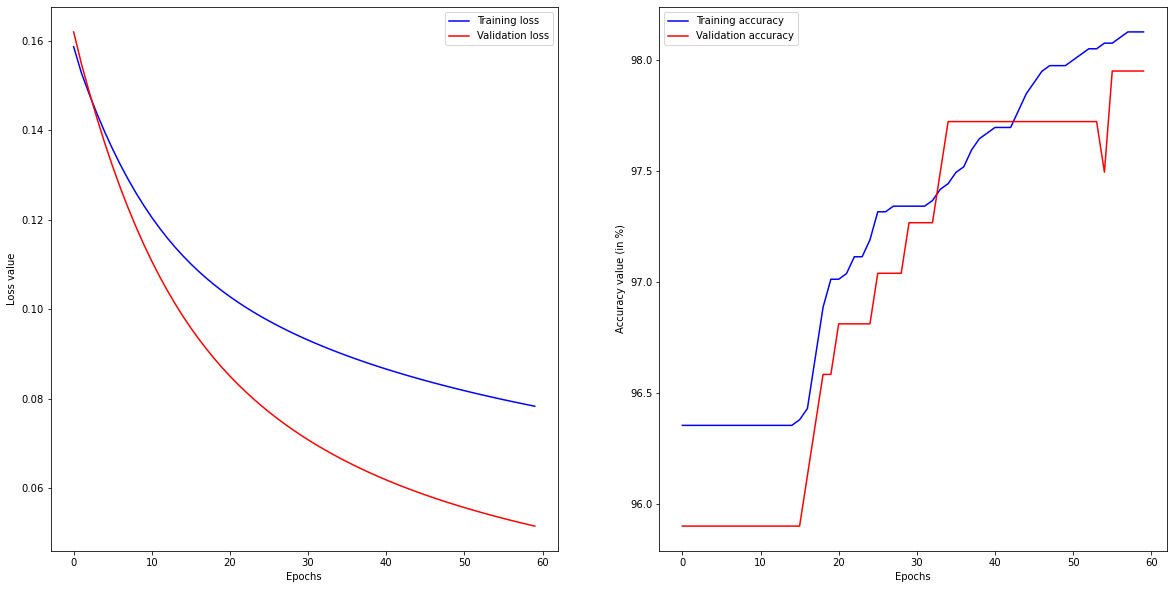

In [7]:
# Visualize training/validation loss and accuracy

MultiClass.visualizer(lr_loss, lr_acc, n_epochs)